## Part II: Logistic regression and classification:
Problem statement: Given some labels $y^i$ for set of inputs $x^i$, where $y \in (0,1)$, we wish to classify new x.
The function $h(x)$ used here is a logistic or sigmoid function given as:
$h(x) = g(b^Tx) = 1/(1 + e^-{b^{T}x})$, $g(z) = 1/1 + e^{-z}$

## Dataset from UCI: Cleveland Heart Disease Dataset:
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

0 - No heart disease, 1-4: Type of heart disease

## Goal: Using a logistic regression model, we want to predict if the particular row or individual has heart disease.

## Model setup and steps:
1. Number of $\theta$ parameters in our dataset is 13, while the last column is the label of each prediction.
<br>
<br>
2. We can design a simple model by the equation: $ y_{j} = \sum_{i}^{p}\theta_{i}^{T}x_{ij}$, where $\theta = [\theta_{1}, \theta_{2} \dots \theta_{p}]$, p is the number of parameters which is 13 and $y_{j}$ represents the observation or label for jth individual, in which j is the number of rows in our dataset.
<br>
<br>
3. The cost function $h_{\theta}(x_{j}) = \sum_{i}^{p}\theta_{i}^{T}x_{ij}$ for one row of our data or one individual.
<br>
<br>
4. Relation between cost function and sigmoid(or logistic funciton) $h_{\theta}(x_{j}) = g(\sum_{i}^{p}\theta_{i}^{T}x_{ij}) = g(\Theta^{T}X) = 1/(1 + e^{-(\sum_{i}^{p}\theta_{i}^{T}x_{ij})})$. Here X is our design matrix of dimensions (nrows, 13) and \Theta is our weight vector of dimensions (13,1).
<br>
<br>
5. Train the data using Newton-raphson for logistic regression and measure loss, accuracy for validation and test set

## Feature and label extraction: 

In [2]:
import scipy.stats as sp
%matplotlib notebook
import numpy as np
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [3]:
## convert all values to float
data = pd.read_csv('../datasets/Binary/processed.cleveland.data')
data.columns=list('abcdefghijklmn')
## convert labels 1-4 to 1 for heart disease and 0 for no heart disease as per our problem statement
data.loc[data.iloc[:,13]>=1,data.columns[13]] =  1

In [4]:
## Separate features y and x
y = data.iloc[:, 13]
x = data.iloc[:,0:10]

## separate training and testing
x_train = x.iloc[1:200, :]
y_train = y.iloc[1:200]
x_val = x.iloc[200:250,:]
y_val = y.iloc[200:250]
x_test = x.iloc[250:data.shape[0], :]
y_test = y.iloc[250:data.shape[0]]

## Visualize import features that can be captured by logistic regression

<IPython.core.display.Javascript object>


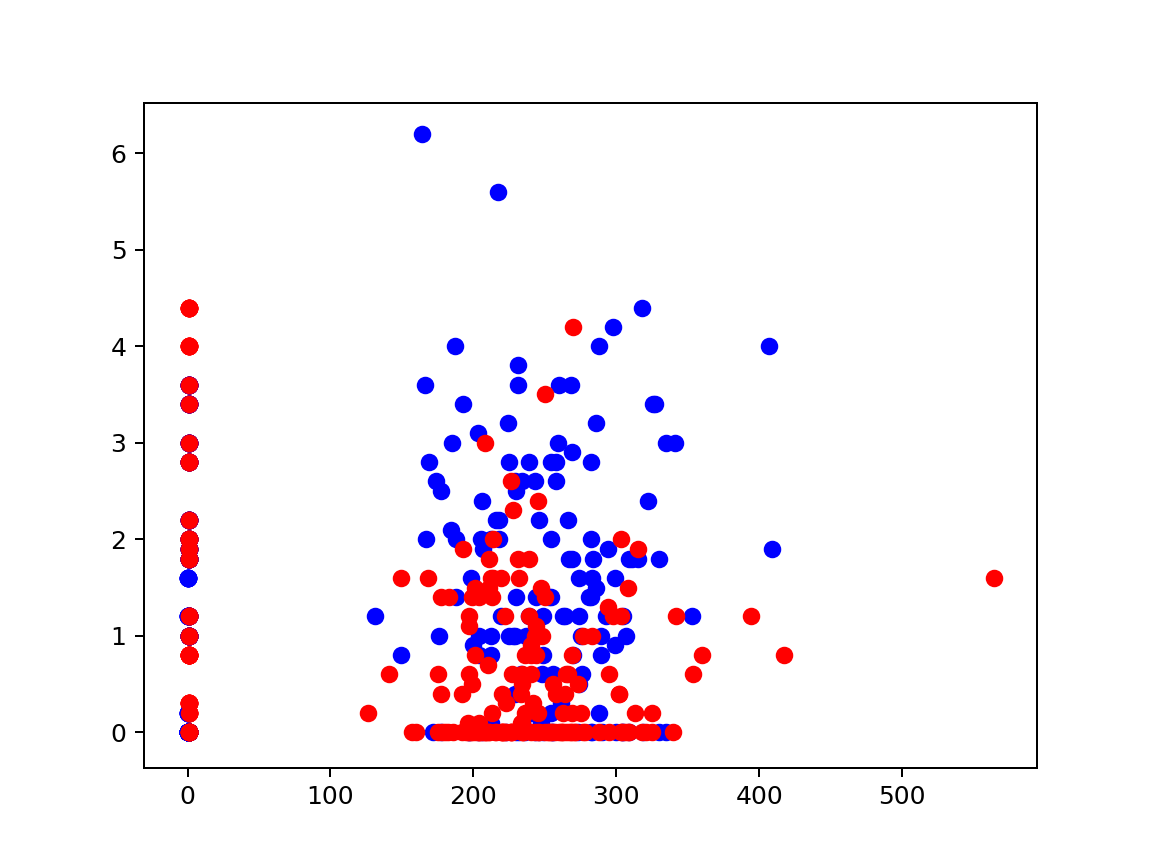

In [5]:
ax = plt.axes()
ax.scatter(data.loc[data['n'] == 1].iloc[:, 4], data.loc[data['n'] == 1].iloc[:, 9], color='blue')
ax.scatter(data.loc[data['n'] == 0].iloc[:, 4], data.loc[data['n'] == 0].iloc[:, 9], color='red')


## Gradient ascent algorithm for estimating $\Theta$ by netwon raphson

In [6]:
## Initialize first and second derivative arrays
del_loss1 = np.zeros(x_train.shape)
del_loss2 = np.zeros((x_train.shape[1], x_train.shape[1]))
wts = np.zeros(x_train.shape[1])
D_hess = np.diag(np.zeros(y_train.shape))
x_train_np = x_train.as_matrix()
X = np.transpose(x_train_np)
a = 0.01

C:\Users\adhal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [7]:
def compute_weights(wts, x_train, y_train, niters):
    for j in range(niters):
        ## Get hessian matrix
        for k in range(y_train.shape[0]):
            for i in range(x_train.shape[1]):
                sig_zi = 1/(1 + np.exp(-np.dot(np.transpose(wts), x_train_np[i])))
                del_loss1[i] = np.dot(x_train_np[i], sig_zi - y_train.iloc[i]) ## compute  gradient step

            D_hess = ((1+np.exp(np.dot(wts,x_train_np[k])))**(-1))*((1+np.exp(-(np.dot(wts,x_train_np[k]))))**(-1))
            Dxt = np.dot(D_hess,np.transpose(X))
            xDxt = np.dot(X, Dxt) ## hessian matrix
            ## update step 
            wts = wts - np.dot(np.linalg.inv(xDxt), np.transpose(del_loss1[i]))
    return wts

In [8]:
## Optimize the loss
wts = compute_weights(wts, x_train_np, y_train, 10)

## Run the model on testing data to predict the labels

In [9]:
y_pred_test = np.zeros(y_test.shape[0])
y_pred_train = np.zeros(y_train.shape[0])
x_test_np = x_test.as_matrix()

C:\Users\adhal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
for i in range(y_test.shape[0]):
    y_pred_test[i] = 1/(1 + np.exp(-np.dot(np.transpose(wts), x_test_np[i])))
for i in range(y_train.shape[0]):
    y_pred_train[i] = 1/(1 + np.exp(-np.dot(np.transpose(wts), x_train_np[i])))

## Convert y_test predictions to 1 if  greater than 0.5 and 0 otherwise 

In [11]:
y_test_pred = y_pred_test >= 0.5
y_test_pred = y_test_pred.astype(int)
y_test_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

## Match the predicted labels to original labels

In [12]:
matched_labels = y_test_pred == y_test
matched_labels = matched_labels.astype(int)
accuracy = np.sum(matched_labels)/len(matched_labels)

In [13]:
accuracy

0.5961538461538461

## Plotting the matched labels to differentiate

In [14]:
test_1_pred = np.where(y_pred_test >= 0.5)
test_1_true = np.where(y_test == 1)

In [27]:
y_test

250    1
251    0
252    0
253    0
254    0
255    0
256    0
257    0
258    1
259    0
260    1
261    0
262    0
263    1
264    1
265    1
266    1
267    1
268    0
269    1
270    0
271    1
272    0
273    1
274    0
275    0
276    0
277    1
278    0
279    1
280    0
281    1
282    0
283    1
284    1
285    1
286    0
287    0
288    0
289    1
290    0
291    1
292    1
293    1
294    0
295    1
296    1
297    1
298    1
299    1
300    1
301    0
Name: n, dtype: int64

In [31]:
for x in test_1_pred:
    x += 250

    

In [30]:
test_1_true

(array([250, 258, 260, 263, 264, 265, 266, 267, 269, 271, 273, 277, 279,
        281, 283, 284, 285, 289, 291, 292, 293, 295, 296, 297, 298, 299,
        300], dtype=int64),)

In [32]:
test_1_pred

(array([250, 251, 253, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272,
        279, 280, 282, 283, 291, 293, 294, 295, 298, 299, 301], dtype=int64),)

In [34]:
data.iloc[test_1_pred]

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
250,58.0,1.0,4.0,146.0,218.0,0.0,0.0,105.0,0.0,2.0,2.0,1.0,7.0,1
251,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
253,43.0,1.0,4.0,115.0,303.0,0.0,0.0,181.0,0.0,1.2,2.0,0.0,3.0,0
262,44.0,1.0,3.0,120.0,226.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0
263,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,1
264,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,1
266,59.0,1.0,3.0,126.0,218.0,1.0,0.0,134.0,0.0,2.2,2.0,1.0,6.0,1
267,40.0,1.0,4.0,152.0,223.0,0.0,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1
268,42.0,1.0,3.0,130.0,180.0,0.0,0.0,150.0,0.0,0.0,1.0,0.0,3.0,0


Populating the interactive namespace from numpy and matplotlib


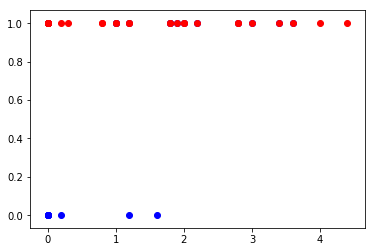

In [49]:
%matplotlib inline
%pylab inline
ax = plt.axes()
ax.scatter(data.iloc[test_1_pred].iloc[:,9], data.iloc[test_1_pred].iloc[:, 13], color='blue')
ax.scatter(data.iloc[test_1_true].iloc[:,9], data.iloc[test_1_true].iloc[:, 13], color='red')


## Conclusion:
We can see that in the above example, though we select the true and predicted indices for y label of 1, there are 4 predictions made by our model which are falsely classified as 0's plotted by blue colour, for our test dataset. The overall accuracy of our method was determined by the formula:

Accuracy = $ y_$